# MNIST
* 2개의 히든 레이어를 도입한다.
* input layer는 28*28개의 노드
* hidden layer의 노드의 수는 자유롭게 설정해도 좋다.
* output은 10개(0~9)로 설정한다.

test data를 예측하여 정확도를 최대가 되도록 학습하여라.
* 제출 시 test data의 정확도를 출력하여 제출하세요.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torch.utils.data import Dataset, DataLoader
import math

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)
import time

In [2]:
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = torchvision.transforms.ToTensor(), 
    download = True,            
)
test_data = torchvision.datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = torchvision.transforms.ToTensor()
)

train_data

test_data # 제출시 이 test 데이터에 대한 정확도를 출력하세요.

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [3]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 1000

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch_size, 
                                           num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data, 
                                          batch_size=batch_size, 
                                          num_workers=num_workers)

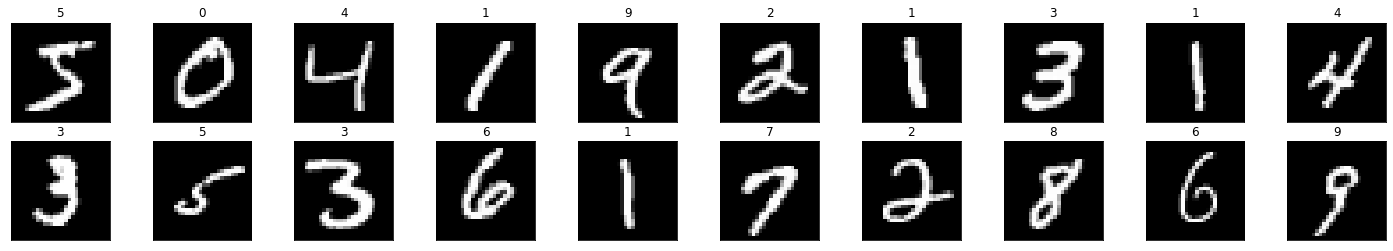

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [5]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        self.fc = nn.Sequential(
            nn.Linear(28*28, 300),
            nn.ReLU(inplace=True),
            nn.Linear(300, 300),
            nn.ReLU(inplace=True),
            nn.Linear(300, 10) 
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return F.softmax(x)

In [6]:
device = torch.device("cpu")

model = Network().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=3e-3)

In [7]:
def train(model, epoch, train_loader, device, optimizer):
    model.train()
    for batch_i, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        
        output = model(data)
        loss = F.cross_entropy(output, target)
        
        loss.backward()
        optimizer.step()
        
#         if batch % 100 == 0:
#             print(f"Train Epoch: {epoch} [{batch * len(data)}/{len(train_loader.dataset)}({(100. * batch / len(train_loader)):.0f}%)] \tLoss: {loss.item():.6f}")
            
    print(f"\n Train Epoch: {epoch} \tLoss: {loss.item():.6f}")
    return loss

In [8]:
def test(model, test_loader, device):
    model.eval()
    loss = 0
    correct = 0
    with torch.no_grad():
        for batch_i, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = F.cross_entropy(output, target)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            Accuracy = 100. * correct / len(test_loader.dataset)

    print(f"\nTest set: loss: {loss.item():.6f}, Accuracy: {correct}/{len(test_loader.dataset)}({(100. * correct / len(test_loader.dataset)):.2f}%)\n")
    print('----------------------------------------------------')
    return loss, Accuracy

In [9]:
train_loss=[]
test_loss=[]
test_Accuracy = []
def main():
    best_Accuracy = 0
    Accuracy = 0
    i = 0
    for epoch in range(1, epochs+1):
        best_Accuracy = max(best_Accuracy,Accuracy)  
        loss=train(model, epoch, train_loader, device, optimizer)
        train_loss.append(loss)
        loss,Accuracy=test(model, test_loader, device)
        test_loss.append(loss)
        test_Accuracy.append(Accuracy)
        if best_Accuracy >= Accuracy:
            i = i+1
        elif best_Accuracy < Accuracy:
            i = 0  
        if i == 10:
            break

In [10]:
epochs=1000
main()

<ipython-input-5-dd0b44eece9c>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)
C:\ProgramData\Anaconda3\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(



 Train Epoch: 1 	Loss: 2.267305

Test set: loss: 2.265806, Accuracy: 4996/10000(49.96%)

----------------------------------------------------

 Train Epoch: 2 	Loss: 1.984392

Test set: loss: 1.978297, Accuracy: 4852/10000(48.52%)

----------------------------------------------------

 Train Epoch: 3 	Loss: 1.792474

Test set: loss: 1.812928, Accuracy: 7310/10000(73.10%)

----------------------------------------------------

 Train Epoch: 4 	Loss: 1.683071

Test set: loss: 1.711084, Accuracy: 8128/10000(81.28%)

----------------------------------------------------

 Train Epoch: 5 	Loss: 1.647122

Test set: loss: 1.675340, Accuracy: 8266/10000(82.66%)

----------------------------------------------------

 Train Epoch: 6 	Loss: 1.631953

Test set: loss: 1.659587, Accuracy: 8342/10000(83.42%)

----------------------------------------------------

 Train Epoch: 7 	Loss: 1.624199

Test set: loss: 1.651094, Accuracy: 8378/10000(83.78%)

----------------------------------------------------


 Train Epoch: 58 	Loss: 1.517622

Test set: loss: 1.547571, Accuracy: 9404/10000(94.04%)

----------------------------------------------------

 Train Epoch: 59 	Loss: 1.517372

Test set: loss: 1.547216, Accuracy: 9407/10000(94.07%)

----------------------------------------------------

 Train Epoch: 60 	Loss: 1.517138

Test set: loss: 1.546866, Accuracy: 9411/10000(94.11%)

----------------------------------------------------

 Train Epoch: 61 	Loss: 1.516914

Test set: loss: 1.546534, Accuracy: 9411/10000(94.11%)

----------------------------------------------------

 Train Epoch: 62 	Loss: 1.516693

Test set: loss: 1.546209, Accuracy: 9413/10000(94.13%)

----------------------------------------------------

 Train Epoch: 63 	Loss: 1.516484

Test set: loss: 1.545891, Accuracy: 9417/10000(94.17%)

----------------------------------------------------

 Train Epoch: 64 	Loss: 1.516285

Test set: loss: 1.545567, Accuracy: 9420/10000(94.20%)

---------------------------------------------


 Train Epoch: 115 	Loss: 1.510428

Test set: loss: 1.536383, Accuracy: 9488/10000(94.88%)

----------------------------------------------------

 Train Epoch: 116 	Loss: 1.510374

Test set: loss: 1.536289, Accuracy: 9489/10000(94.89%)

----------------------------------------------------

 Train Epoch: 117 	Loss: 1.510317

Test set: loss: 1.536193, Accuracy: 9489/10000(94.89%)

----------------------------------------------------

 Train Epoch: 118 	Loss: 1.510262

Test set: loss: 1.536103, Accuracy: 9489/10000(94.89%)

----------------------------------------------------

 Train Epoch: 119 	Loss: 1.510206

Test set: loss: 1.536018, Accuracy: 9489/10000(94.89%)

----------------------------------------------------

 Train Epoch: 120 	Loss: 1.510156

Test set: loss: 1.535936, Accuracy: 9491/10000(94.91%)

----------------------------------------------------

 Train Epoch: 121 	Loss: 1.510107

Test set: loss: 1.535850, Accuracy: 9490/10000(94.90%)

--------------------------------------

Epoch 10번 동안 best_Accuracy가 갱신되지 않는다면 더 이상의 Tranining은 의미가 없다고 판단했다.

best_Accuracy 는 95.05% 이다.

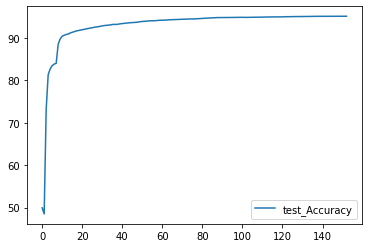

In [13]:
plt.plot(test_Accuracy,label='test_Accuracy')
plt.legend()

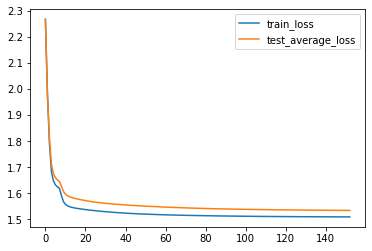

In [11]:
plt.plot(train_loss,label='train_loss')
plt.plot(test_loss,label='test_average_loss')
plt.legend()

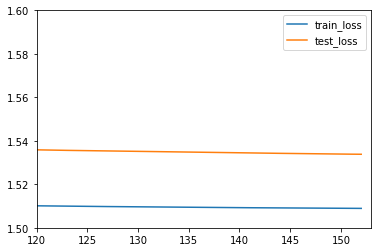

In [15]:
plt.plot(train_loss,label='train_loss')
plt.plot(test_loss,label='test_loss')
plt.xlim([120,153])
plt.ylim([1.5,1.6])
plt.legend()

네트워크가 중지되는 epoch까지 train_loss와  test_loss가 함께 감소하고 있기 때문에 overfitting은 일어나지 않았다.